In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.patches as mpatches

In [58]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [60]:
df['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

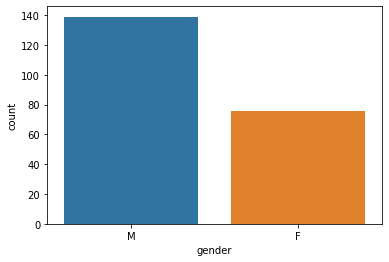

In [61]:
sns.countplot(df['gender'])
plt.show()

In [62]:
df.groupby(['gender','status']).count()

sl_no  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  \
gender status                                                           
F      Not Placed     28     28     28     28     28     28        28   
       Placed         48     48     48     48     48     48        48   
M      Not Placed     39     39     39     39     39     39        39   
       Placed        100    100    100    100    100    100       100   

                   degree_t  workex  etest_p  specialisation  mba_p  salary  
gender status                                                                
F      Not Placed        28      28       28              28     28       0  
       Placed            48      48       48              48     48      48  
M      Not Placed        39      39       39              39     39       0  
       Placed           100     100      100             100    100     100

In [63]:
#Percentage of unemployed women
28/76

0.3684210526315789

In [64]:
#Percentage of unemployed men
39/139

0.2805755395683453

In [65]:
new_date = pd.get_dummies(df)
new_date.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,...,0,0,0,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,...,1,0,0,1,0,1,1,0,0,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,NaN,0,1,1,...,1,0,0,1,1,0,0,1,1,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,0,1,1,...,0,1,0,0,1,0,1,0,0,1


In [66]:
corr = new_date.corr()
corr

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764,-0.074306,0.074306,-0.027214,...,0.018201,-0.039982,0.066666,0.009069,-0.059151,0.059151,-0.046630,0.046630,0.026859,-0.026859
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330,0.068969,-0.068969,-0.116194,...,0.189847,-0.179581,-0.066127,0.221235,-0.175675,0.175675,0.172536,-0.172536,-0.607889,0.607889
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819,0.021334,-0.021334,0.137013,...,-0.226675,0.112816,-0.131382,-0.053599,-0.141025,0.141025,0.241630,-0.241630,-0.491228,0.491228
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272,0.173217,-0.173217,-0.038070,...,0.092006,-0.032755,-0.180408,0.123477,-0.122648,0.122648,0.218286,-0.218286,-0.479861,0.479861
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307,-0.084294,0.084294,0.018991,...,0.055352,-0.012531,0.006907,0.009748,-0.056735,0.056735,0.236315,-0.236315,-0.127639,0.127639
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013,0.300531,-0.300531,-0.083120,...,0.048050,-0.102088,-0.036055,0.125009,-0.168811,0.168811,0.105728,-0.105728,-0.076922,0.076922
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000,-0.158912,0.158912,-0.005539,...,0.049547,-0.160322,-0.016573,0.172492,-0.136920,0.136920,0.146576,-0.146576,NaN,NaN
gender_F,-0.074306,0.068969,0.021334,0.173217,-0.084294,0.300531,-0.158912,1.000000,-1.000000,0.019429,...,-0.042682,0.036215,0.093246,-0.084072,0.085153,-0.085153,-0.106160,0.106160,0.090670,-0.090670
gender_M,0.074306,-0.068969,-0.021334,-0.173217,0.084294,-0.300531,0.158912,-1.000000,1.000000,-0.019429,...,0.042682,-0.036215,-0.093246,0.084072,-0.085153,0.085153,0.106160,-0.106160,-0.090670,0.090670
ssc_b_Central,-0.027214,-0.116194,0.137013,-0.038070,0.018991,-0.083120,-0.005539,0.019429,-0.019429,1.000000,...,-0.058505,0.094939,0.002758,-0.101060,-0.040744,0.040744,-0.051565,0.051565,0.037297,-0.037297


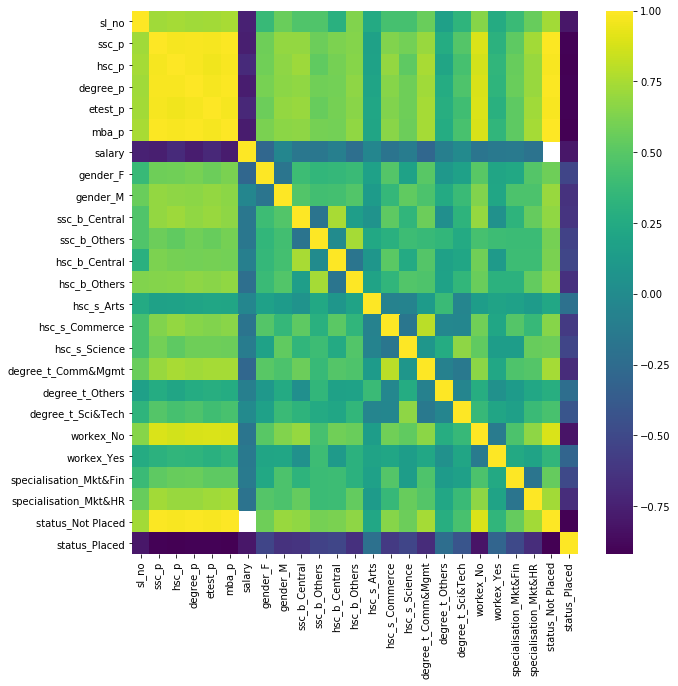

In [68]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
degree = new_date.div(new_date.sum(axis=1), axis=0)
sns.heatmap(degree.corr(), ax=ax, cmap="viridis")
plt.show()


In [70]:
df.groupby(['gender']).agg({'ssc_p':['mean'],'hsc_p':['mean'],'degree_p':['mean'],'etest_p':['mean'],'mba_p':['mean']})

,ssc_p,hsc_p,degree_p,etest_p,mba_p
,mean,mean,mean,mean,mean
gender,,,,,
F,68.310921,66.646842,68.090000,70.590658,64.643553
M,66.752518,66.161655,65.429856,72.926115,60.984892


In [72]:
df.groupby(['gender']).agg({'salary':['mean']})

,salary
,mean
gender,
F,267291.666667
M,298910.000000


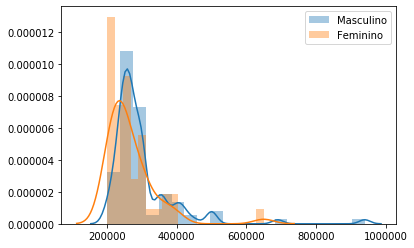

In [51]:
sns.distplot(df.loc[df['gender']=='M',["salary"]],bins=20,label='Masculino')
sns.distplot(df.loc[df['gender']=='F',["salary"]],bins=20,label='Feminino')
plt.legend(loc=0)
plt.show()

In [73]:
df.groupby(['gender']).agg({'workex':['value_counts']})

workex
              value_counts
gender workex             
F      No               54
       Yes              22
M      No               87
       Yes              52

In [86]:
Percentual_Femino_sem_expericia_trabalho=54/(54+22)
print(Percentual_Femino_sem_expericia_trabalho)

0.7105263157894737


In [87]:
Percentual_Masc_sem_expericia_trabalho=87/(52+87)
print(Percentual_Masc_sem_expericia_trabalho)

0.6258992805755396


In [74]:
df.groupby(['gender']).agg({'ssc_b':['value_counts'],'hsc_b':['value_counts']})

ssc_b        hsc_b
          value_counts value_counts
F Central           42           33
  Others            34           43
M Central           74           51
  Others            65           88

In [66]:
Perc_f_localiza_ensec=42/(42+34)
Perc_M_localiza_ensec=74/(74+65)
Perc_f_localiza_ensMed=33/(33+43)
Perc_M_localiza_ensMed=51/(51+88)

In [67]:
print(Perc_f_localiza_ensec)
print(Perc_M_localiza_ensec)
print(Perc_f_localiza_ensMed)
print(Perc_M_localiza_ensMed)

0.5526315789473685
0.5323741007194245
0.4342105263157895
0.3669064748201439


In [76]:
df.groupby(['gender']).agg({'degree_t':['value_counts']}) 

degree_t
                 value_counts
gender degree_t              
F      Comm&Mgmt           53
       Sci&Tech            17
       Others               6
M      Comm&Mgmt           92
       Sci&Tech            42
       Others               5

In [68]:
Femino_Comunicacao_marketing=53/(53+17+6)
Femino_Ciencia_tecnologia=17/(53+17+6)
Femino_outros=6/(53+17+6)
Masculino_Comunicacao_marketing=92/(92+42+5)
Masculino_Ciencia_tecnologia=42/(92+42+5)
Masculino_outros=5/(92+42+5)

In [69]:
print(Femino_Comunicacao_marketing)
print(Femino_Ciencia_tecnologia)
print(Femino_outros)
print(Masculino_Comunicacao_marketing)
print(Masculino_Ciencia_tecnologia)
print(Masculino_outros)

0.6973684210526315
0.2236842105263158
0.07894736842105263
0.6618705035971223
0.302158273381295
0.03597122302158273


In [79]:
df.groupby(['gender']).agg({'specialisation':['value_counts']})

specialisation
                        value_counts
gender specialisation               
F      Mkt&HR                     39
       Mkt&Fin                    37
M      Mkt&Fin                    83
       Mkt&HR                     56

In [71]:
Femino_MK_HR=39/(39+37)
Femino_MK_Fin=37/(39+37)
Masculino_MK_HR=83/(83+56)
Masculino_MK_Fin=56/(83+56)

In [72]:
print(Femino_MK_HR)
print(Femino_MK_Fin)
print(Masculino_MK_HR)
print(Masculino_MK_Fin)

0.5131578947368421
0.4868421052631579
0.5971223021582733
0.4028776978417266
